In [81]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [94]:
df = pd.DataFrame(data = np.random.uniform(size = (3, 3)), columns=['a','b','c'])

In [95]:
df

,a,b,c
0,0.442548,0.664742,0.017061
1,0.375881,0.684627,0.373106
2,0.542612,0.734965,0.347578


In [96]:
pcts=(df.pct_change(1))

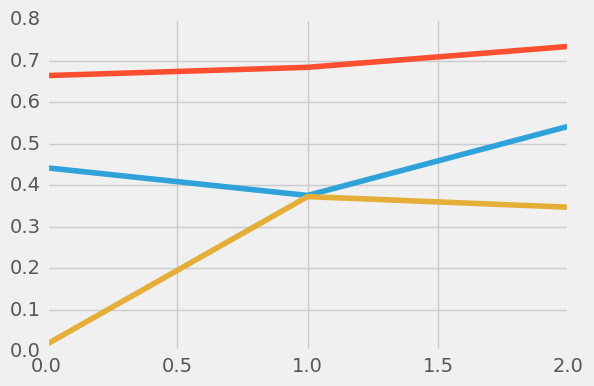

In [97]:
df.plot()
plt.legend().remove()
plt.show()

In [98]:
#df=df.pct_change(periods=4)

In [117]:
def jumpgetter(df, lookback=1, ythresh=.2): #make ythresh a ratio like .1 for a ten percent jump
    pctchanges=df.pct_change(periods=lookback)
    tfdf=pd.DataFrame() #initialize
    for col in range(len(pctchanges.columns)):
        if ythresh>0:
            jumpyeaornay=df[pctchanges.columns[col]]>ythresh
            jumpyeaornay.rename(df.columns[col])
        if ythresh<0:
            jumpyeaornay=df[pctchanges.columns[col]]<ythresh
        tfdf[df.columns[col]]=jumpyeaornay
    jumpsofthresh=pd.DataFrame(tfdf.values*pctchanges.values)
    return tfdf
        

In [118]:
jumpgetter(df)

,a,b,c
0,True,True,False
1,True,True,True
2,True,True,True


In [64]:
jumpgetter(df).sort_values(ascending=False)

9    394.268891
4     33.758621
3     24.622377
7     20.103420
0     12.340820
5      9.519922
1      3.714001
6      3.233945
8      1.425254
2      1.126915
dtype: float64

In [144]:
takeitalldf

NameError: name 'takeitalldf' is not defined

In [ ]:
def meanRevert(df,k,m):
    mean = df[df.columns[1]].rolling(window = k).mean()
    stddev = df[df.columns[1]].rolling(window = k).std()
    buy=df[df.columns[1]]<(mean-m*stddev)
    sell=df[df.columns[1]]>(mean+m*stddev)
    Order=buy*1+sell*-1
    df["Order"] = Order
    return df


In [8]:
df.values

array([[             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan],
       [ -2.97081075e-01,  -2.44368722e-01,  -6.54382559e-01,
          1.13379158e+00,  -2.13709887e-01,   1.10497652e+01,
          6.36226414e+00,  -2.43662103e-01,  -7.76358336e-01,
          1.65939763e+00],
       [ -9.65387596e-01,   5.74729772e-03,   1.60304139e+00,
         -9.84809916e-01,   8.64923688e-02,   3.70818710e-01,
          6.53879628e-02,   5.71492385e-01,   4.75410349e+00,
         -3.90932350e-01],
       [  3.44328334e+01,  -2.15734247e-01,  -1.70969064e-02,
          3.58883727e+01,  -7.34104771e-01,  -4.74928299e-01,
         -7.03615705e-01,  -7.00096948e-01,  -6.64714252e-01,
         -8.68673510e-01],
       [  7.08526113e-03,   9.62713058e-01,  -8.65271048e-01,
          8.40366783e-01,   3.49474683e+00,   5.45406899e-01,
         -8.97822518e-01

In [42]:
df.values[5][1]

0.07252675944006548

In [7]:
#a=0
#for i in df.values:
#    print df.values

In [8]:
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.1 #threshold
    x=1 #lookahead period
    for i in range(1,3): #go over the columns. skip the first one because it is a set of dates change 3 to len(df.columns) for implementation
        counter=0
        for j in range(len(df.values[1:10])): #go down and check for each row
            if (j+x)<len(df.values): #execute the following code until the final date minus the lookahead
                if type(df.values[j][i])!=str:
                    if math.isnan(float(df.values[j][i]))==False:
                        currentPrice=df.values[j][i]
                        futurePrice=df.values[j+x][i]
                        if futurePrice>currentPrice:
                            posneg=1
                        elif futurePrice<currentPrice:
                            posneg=0
                        percentJump=abs((currentPrice-futurePrice)/currentPrice)
                        if (currentPrice-futurePrice)/currentPrice>=y:
                            counter+=1
                            avgDailyRateChange=percentJump/(x+counter-1)
                        elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                            listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                            counter=0

In [114]:
def meanRevert(df,k=2,m=1):
    print df[df.columns[4000]][1]
    for col in range(len(df.columns)):
        value = df[df.columns[col]].rolling(window = k)
        print value
    stddev = df[df.columns[1]].rolling(window = k).std()
    buy=df[df.columns[1]]<(value-m*stddev)
    sell=df[df.columns[1]]>(value+m*stddev)
    Order=buy*1+sell*-1
    df["Order"] = Order
    return df


In [5]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.898081,0.819774,0.967540,0.390697,0.871949,0.051141,0.121374,0.208048,0.659188,0.348242
1,0.631278,0.619447,0.334399,0.833666,0.685605,0.616239,0.893589,0.157354,0.147422,0.926113
2,0.021850,0.623007,0.870453,0.012663,0.744904,0.844751,0.952019,0.247281,0.848281,0.564066
3,0.774210,0.488603,0.855571,0.467134,0.198066,0.443555,0.282164,0.074160,0.284416,0.074077
4,0.779695,0.958987,0.115270,0.859699,0.890259,0.685473,0.028831,0.520450,0.489286,0.146047
5,0.692702,0.849408,0.851529,0.891532,0.567549,0.630159,0.750317,0.339730,0.554994,0.242610
6,0.114397,0.827264,0.922392,0.127692,0.427963,0.868217,0.460233,0.440543,0.518397,0.200102
7,0.567114,0.116925,0.037476,0.462845,0.457836,0.493362,0.748898,0.377086,0.499854,0.965852
8,0.229454,0.401255,0.353903,0.629016,0.955613,0.743558,0.025982,0.800996,0.342961,0.296042
9,0.900034,0.723615,0.617624,0.119426,0.947651,0.312563,0.223115,0.950939,0.833836,0.385326


In [116]:
df=df.pct_change()

In [59]:
def jumpFilter(df, y=.1,x=1):
    lastPrice=1000 #something really high so that we do not have to call the first thing a jump
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.5 #threshold
    x=1 #lookahead period
    for i in range(1,len(df.columns)): #go over the columns. skip the first one because it is a set of dates; change 3 to len(df.columns) for implementation
        counter=0
        for j in range(len(df.values[1:3])): #go down and check for each row; get rid of the [1:10] to be comprehensive
            if (j+x)<len(df.values): #execute the following code until the final date minus the lookahead
                if type(df.values[j][i])!=str:
                    if math.isnan(float(df.values[j][i]))==False:
                        if df.values[j][i]!=0:
                            currentPrice=df.values[j][i]
                            futurePrice=df.values[j+x][i]
                            if futurePrice>currentPrice:
                                posneg=1
                            elif futurePrice<currentPrice:
                                posneg=0
                            percentJump=abs((currentPrice-futurePrice)/currentPrice)
                            if (currentPrice-futurePrice)/currentPrice>=y:
                                counter+=1
                                avgDailyRateChange=percentJump/(x+counter-1)
                            elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                                listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                                counter=0
    return listOfJumps

In [60]:
jumpFilter(df)

KeyboardInterrupt: 

In [ ]:

def jumpFilter(df):
    for i in range(len(df.columns[:])):
        last = df[df.columns[i]].rolling(1)
        print last.values
    type(last)

In [43]:
def jumpFilter(df, y=.1,x=1):
    lastPrice=1000 #something really high so that we do not have to call the first thing a jump
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.1 #threshold
    x=1 #lookahead period
    for i in range(len(df.columns[:])):
        counter=0
        for j in range(len(df.values)):
            if (j+x)<len(df.values):
                currentPrice=df.values[j][i]
                futurePrice=df.values[j+x][i]
                if futurePrice>currentPrice:
                    posneg=1
                elif futurePrice<currentPrice:
                    posneg=0
                percentJump=abs((currentPrice-futurePrice)/currentPrice)
                if (currentPrice-futurePrice)/currentPrice>=y:
                    counter+=1
                    avgDailyRateChange=percentJump/(x+counter-1)
                elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                    listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                    counter=0
    return listOfJumps
toputindataframe=jumpFilter(df)

In [47]:

pd.DataFrame(toputindataframe)

,0,1,2,3,4,5,6,7
0,A,0.095623,0.1,1,1,5.746634,0.885621,1
1,A,0.010065,0.1,1,1,86.878410,0.487835,2
2,A,0.645107,0.1,1,1,0.401676,0.270645,1
3,A,0.177062,0.1,1,1,1.333222,0.804185,1
4,A,0.211029,0.1,1,1,3.649498,0.489187,1
5,A,0.191470,0.1,1,1,2.543709,0.219042,2
6,A,0.596467,0.1,1,1,0.302831,0.112731,2
7,A,0.236987,0.1,1,1,0.783157,0.695035,1
8,A,0.135634,0.1,1,1,0.148624,0.290689,2
9,A,0.454835,0.1,1,1,1.145624,0.503757,1


In [39]:
def jumpFilter(df, y=.1,x=1):
    lastPrice=1000 #something really high so that we do not have to call the first thing a jump
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.1 #threshold
    x=1 #lookahead period
    for i in range(1,3): #go over the columns. skip the first one because it is a set of dates change 3 to len(df.columns) for implementation
        counter=0
        for j in range(len(df.values[1:10])): #go down and check for each row
            if (j+x)<len(df.values): #execute the following code until the final date minus the lookahead
                if type(df.values[j][i])!=str:
                    if math.isnan(float(df.values[j][i]))==False:
                        currentPrice=df.values[j][i]
                        futurePrice=df.values[j+x][i]
                        if futurePrice>currentPrice:
                            posneg=1
                        elif futurePrice<currentPrice:
                            posneg=0
                        percentJump=abs((currentPrice-futurePrice)/currentPrice)
                        if (currentPrice-futurePrice)/currentPrice>=y:
                            counter+=1
                            avgDailyRateChange=percentJump/(x+counter-1)
                        elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                            listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                            counter=0
    return listOfJumps

In [41]:
pd.DataFrame(jumpFilter(df))

[['B',
  0.83602532704623644,
  0.1,
  1,
  1,
  132.73110862745247,
  0.99501857040856734,
  1],
 ['B',
  0.64513569016619821,
  0.1,
  1,
  1,
  1.355025582782045,
  0.19655551469043106,
  1],
 ['B',
  0.010064935040933087,
  0.1,
  1,
  1,
  0.25335481261398751,
  0.075509974717270348,
  2],
 ['B',
  0.64510737528245843,
  0.1,
  1,
  1,
  3.9534905376356377,
  0.80579216926245445,
  1],
 ['C',
  0.64513569016619821,
  0.1,
  1,
  1,
  0.36700959112795994,
  0.26170751155545419,
  1],
 ['C',
  0.010064935040933087,
  0.1,
  1,
  1,
  9.0612099740977126,
  0.91355066124965389,
  1],
 ['C',
  0.64510737528245843,
  0.1,
  1,
  1,
  1.0611906286466595,
  0.77577973067023109,
  1]]

In [33]:
def isJump(df, x, yThresh, posneg):
    current = df[row][column]
    future = df[row+x][column]
    y= (current + future)/(current*x)
    if posneg == True:
        if y >= yThresh:
            counter += 1
            return True
    if posneg!= True:
        if y <= yThresh:
            counter += 1
            return True
    else:
        if counter <= 1
        #Append the relevant data to the output DF
        

def cascade(df, yThresh, posneg):
    df = pd.DataFrame(data = np.random.uniform(size = (100, 5)),columns = ["A","B","C","D","E"])
    for column in range (len(df.columns)):
        counter = 0 
        for row in range(len(array)):
            if isJump(df,1,yThresh,posneg)== True:
                while counter =! 0:
                    isJump(df, counter, yThresh, posneg)
                    
                    
    

SyntaxError: invalid syntax (<ipython-input-33-9aa6b176a97e>, line 14)